In [2]:
#importa módulo e documento

In [3]:
import pandas as pd

In [4]:
base = pd.read_csv(r"C:\Users\kaio_\OneDrive\Documentos\estudos\Impacta\Machine Learning\machine learning\Projeto - Modelagem RH\modelagem_rh.csv")

In [5]:
#Faz a contagem do atributo

In [6]:
base.saiu.value_counts()

0    11428
1     3571
Name: saiu, dtype: int64

In [14]:
#Executa a porcentagem da proporção

In [15]:
base.saiu.value_counts()/len(base)*100

0    76.191746
1    23.808254
Name: saiu, dtype: float64

In [16]:
#Vizualisar em formato de gráfico

In [17]:
!pip install matplotlib


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import matplotlib.pyplot as plt

In [19]:
#Para que ele exiba o gráfico no meu notebook

In [20]:
%matplotlib inline

In [21]:
#Exibir gráfico

<Axes: >

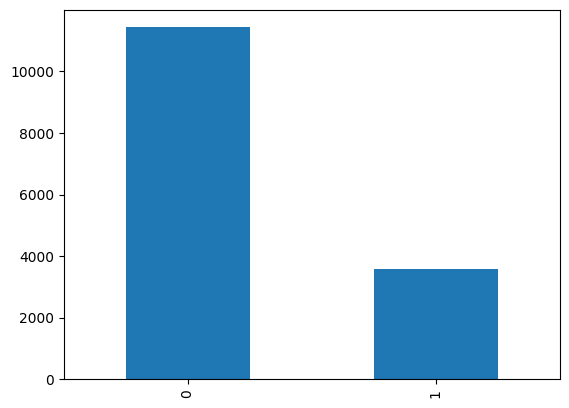

In [22]:
base.saiu.value_counts().plot(kind="bar")

In [23]:
#Editar base do grgráfico 

([<matplotlib.axis.XTick at 0x237da431270>,
 [Text(0, 0, 'não saiu'), Text(1, 0, 'saiu')])

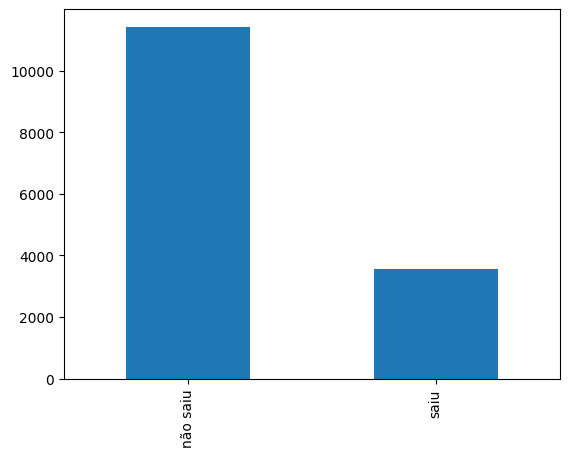

In [24]:
base.saiu.value_counts().plot(kind="bar")
plt.xticks((0,1),["não saiu","saiu"])

In [25]:
#CROSSTAB - Exibe a frequência de um objeto

In [26]:
pd.crosstab(base.departamento, base.saiu)

saiu,0,1
departamento,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [27]:
#Cria a váriavel base

In [28]:
valores = pd.crosstab(base.departamento, base.saiu)

In [29]:
#Somar conteudo extraido do departamento

In [30]:
soma = valores.sum(axis=1)
soma

departamento
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [31]:
#Proporção em porcentagem

In [32]:
#Proporção Salários 

In [33]:
pd.crosstab(base.salario, base.saiu)

saiu,0,1
salario,,
high,1155,82
low,5144,2172
medium,5129,1317


In [34]:
valores_salario = pd.crosstab(base.salario, base.saiu)
soma_salario = valores_salario.sum(axis=1)

In [35]:
#Divisão 

In [36]:
valores_salario.divide(soma_salario, axis=0)*100

saiu,0,1
salario,,
high,93.371059,6.628941
low,70.311646,29.688354
medium,79.568725,20.431275


In [37]:
#Inserir toda informação numa variável 

In [38]:
proc_salario = valores_salario.divide(soma_salario, axis=0)*100


<Axes: xlabel='salario'>

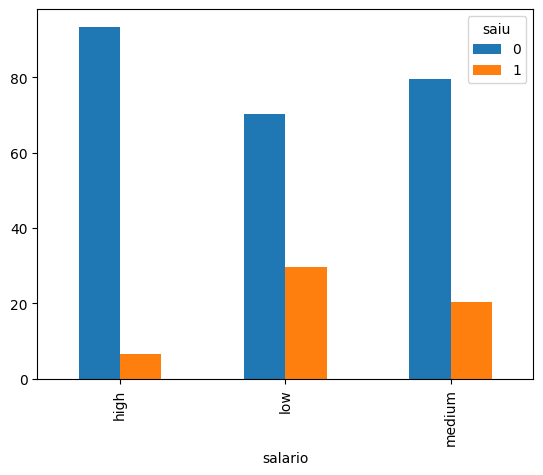

In [39]:
proc_salario.plot(kind="bar")

In [40]:
#Modo de gráfico empilhado

<Axes: xlabel='salario'>

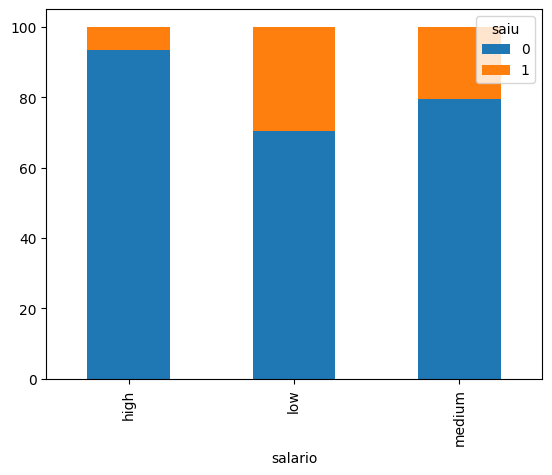

In [41]:
proc_salario.plot(kind="bar", stacked = True)

In [42]:
#Visão Geral dos Atributos

In [43]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nivel_satisfacao    14978 non-null  float64
 1   ult_avaliacao       14999 non-null  float64
 2   num_projetos        14999 non-null  int64  
 3   media_horas_mes     14999 non-null  int64  
 4   tempo_empresa       14999 non-null  int64  
 5   aci_trabalho        14999 non-null  int64  
 6   saiu                14999 non-null  int64  
 7   promocao_ult_5anos  14999 non-null  int64  
 8   departamento        14999 non-null  object 
 9   salario             14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [49]:
#Verifica cada linha (atributo) se está vazio ou não

In [50]:
base.isnull().sum()

nivel_satisfacao      21
ult_avaliacao          0
num_projetos           0
media_horas_mes        0
tempo_empresa          0
aci_trabalho           0
saiu                   0
promocao_ult_5anos     0
departamento           0
salario                0
dtype: int64

In [51]:
#Identifica linhas vazias

In [79]:
base.nivel_satisfacao.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
14994    False
14995    False
14996    False
14997    False
14998    False
Name: nivel_satisfacao, Length: 14999, dtype: bool

In [80]:
#Media nivel de satifação

In [81]:
base.loc[base.nivel_satisfacao.isnull(),'nivel_satisfacao']=\
base.nivel_satisfacao.mean()

In [82]:
#Checagem se está tudo certo

In [83]:
base.isnull().sum()

nivel_satisfacao            0
ult_avaliacao               0
num_projetos                0
media_horas_mes             0
tempo_empresa               0
aci_trabalho                0
saiu                        0
promocao_ult_5anos          0
departamento_RandD          0
departamento_accounting     0
departamento_hr             0
departamento_management     0
departamento_marketing      0
departamento_product_mng    0
departamento_sales          0
departamento_support        0
departamento_technical      0
salario_low                 0
salario_medium              0
dtype: int64

In [84]:
#Transformando atributos categóricos em atributos binários

In [85]:
base = pd.get_dummies(base,drop_first = True)

In [86]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [87]:
#Retorna o valor máximo dos atributos

In [88]:
base.max()

nivel_satisfacao              1.0
ult_avaliacao                 1.0
num_projetos                  7.0
media_horas_mes             310.0
tempo_empresa                10.0
aci_trabalho                  1.0
saiu                          1.0
promocao_ult_5anos            1.0
departamento_RandD            1.0
departamento_accounting       1.0
departamento_hr               1.0
departamento_management       1.0
departamento_marketing        1.0
departamento_product_mng      1.0
departamento_sales            1.0
departamento_support          1.0
departamento_technical        1.0
salario_low                   1.0
salario_medium                1.0
dtype: float64

In [89]:
#Data frame

In [90]:
pd.DataFrame([base.max(), base.min()], index=["max", "min"]).T

,max,min
nivel_satisfacao,1.0,0.09
ult_avaliacao,1.0,0.36
num_projetos,7.0,2.00
media_horas_mes,310.0,96.00
tempo_empresa,10.0,2.00
aci_trabalho,1.0,0.00
saiu,1.0,0.00
promocao_ult_5anos,1.0,0.00
departamento_RandD,1.0,0.00
departamento_accounting,1.0,0.00


In [91]:
!pip install scikit-learn


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [92]:
#Normalizar base de dados em 0 e 1
from sklearn import preprocessing

In [99]:
x = base.values
x

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [96]:
minmax = preprocessing.MinMaxScaler()

In [97]:
#Transform X

In [98]:
x_scaled = minmax.fit_transform(x)
x_scaled

array([[0.31868132, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.78021978, 0.78125   , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.02197802, 0.8125    , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.30769231, 0.265625  , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02197802, 0.9375    , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.30769231, 0.25      , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [100]:
#Chama o Data Frame

In [101]:
base = pd.DataFrame(x_scaled, columns = base.columns)

In [102]:
base.head()

,nivel_satisfacao,ult_avaliacao,num_projetos,media_horas_mes,tempo_empresa,aci_trabalho,saiu,promocao_ult_5anos,departamento_RandD,departamento_accounting,departamento_hr,departamento_management,departamento_marketing,departamento_product_mng,departamento_sales,departamento_support,departamento_technical,salario_low,salario_medium
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [103]:
#Visualiza o número mínimo e máximo

In [104]:
pd.DataFrame([base.max(), base.min()], index=["max", "min"]).T

,max,min
nivel_satisfacao,1.0,0.0
ult_avaliacao,1.0,0.0
num_projetos,1.0,0.0
media_horas_mes,1.0,0.0
tempo_empresa,1.0,0.0
aci_trabalho,1.0,0.0
saiu,1.0,0.0
promocao_ult_5anos,1.0,0.0
departamento_RandD,1.0,0.0
departamento_accounting,1.0,0.0


In [105]:
#SElecopma todas as colunas

In [151]:
cols = list(base.columns)
cols

['nivel_satisfacao',
 'ult_avaliacao',
 'num_projetos',
 'media_horas_mes',
 'tempo_empresa',
 'aci_trabalho',
 'saiu',
 'promocao_ult_5anos',
 'departamento_RandD',
 'departamento_accounting',
 'departamento_hr',
 'departamento_management',
 'departamento_marketing',
 'departamento_product_mng',
 'departamento_sales',
 'departamento_support',
 'departamento_technical',
 'salario_low',
 'salario_medium']

In [152]:
#Remove a coluna

In [153]:
cols.remove("saiu")
cols

['nivel_satisfacao',
 'ult_avaliacao',
 'num_projetos',
 'media_horas_mes',
 'tempo_empresa',
 'aci_trabalho',
 'promocao_ult_5anos',
 'departamento_RandD',
 'departamento_accounting',
 'departamento_hr',
 'departamento_management',
 'departamento_marketing',
 'departamento_product_mng',
 'departamento_sales',
 'departamento_support',
 'departamento_technical',
 'salario_low',
 'salario_medium']

In [154]:
#seleciona todas as colunas

In [155]:
X = base[cols]

In [156]:
y = base["saiu"]

In [157]:
#importar os algoritimos para a nossa modelagem
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [158]:
#criar a instancia do modelo

In [159]:
knn = KNeighborsClassifier(n_neighbors=3)
tree = DecisionTreeClassifier()

In [160]:
#

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
#Passa as proporções

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train
print(X_train.shape, X_test.shape)

(11999, 18) (3000, 18)


In [184]:
#
from sklearn.metrics import confusion_matrix, accuracy_score

knn.fit(X_train, y_train)
predicted = knn.predict(X_test)
accuracy_score(predicted, y_test)

0.9476666666666667

In [185]:
#consultar se o programa está funcionando

In [186]:
confusion_matrix(predicted, y_test)

array([[2173,   54],
       [ 103,  670]], dtype=int64)

In [187]:
#
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [189]:
#
accuracy_score(tree.predict(X_test), y_test)

0.9806666666666667

In [190]:
#
confusion_matrix(tree.predict(X_test), y_test)

array([[2240,   22],
       [  36,  702]], dtype=int64)

In [192]:
#Validação cruzada
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, x, y, cv=5, scoring="accuracy")
scores

array([0.96666667, 0.931     , 0.93433333, 0.95733333, 0.95165055])

In [193]:
#Desempenho média do modelo na validação cruzada

In [194]:
scores.mean()

0.9481967767033457

In [195]:
#Desvio padrão

In [196]:
scores.std()

0.013597545694866528

In [197]:
#Arvore de decisão

In [201]:
scores_tree = cross_val_score(tree, X, y, cv=5, scoring="accuracy")
scores_tree

array([0.97833333, 0.95933333, 0.972     , 0.99066667, 0.97399133])

In [202]:
#Média em relação dos scores

In [203]:
scores_tree.mean()

0.9748649327553629

In [204]:
#Desvio padrão

In [205]:
scores_tree.std()

0.01011855917086399

In [206]:
#Exibir os 5 mais importantes atributos

In [207]:
tree.feature_importances_

array([5.02360701e-01, 1.43996636e-01, 1.06407899e-01, 8.73169079e-02,
       1.41900477e-01, 1.48491042e-03, 3.73929898e-05, 1.21015305e-03,
       9.43350772e-04, 1.12660826e-03, 4.70267127e-04, 8.32878301e-04,
       4.45976276e-04, 1.78402789e-03, 3.28797531e-03, 2.19791340e-03,
       2.50393440e-03, 1.69198987e-03])

In [208]:
#Colocando as colunas como variáveis 

<Axes: >

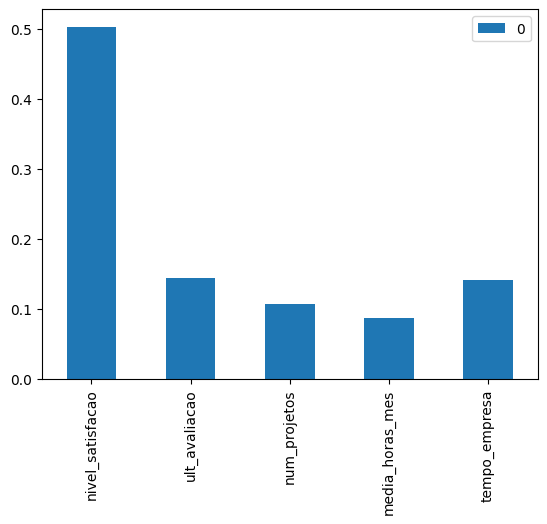

In [212]:
pd.DataFrame(tree.feature_importances_, index = X.columns)[:5].plot(kind="bar")

In [213]:
#
import pickle

In [214]:
tree.fit(X, y)

DecisionTreeClassifier()

In [217]:
pickle.dump(tree, open("modelo_hr.pickle","wb"))

In [218]:
#Carregar o modelo a partir do que foi salvo

In [219]:
tree_salva = pickle.load(open("modelo_hr.pickle","rb"))

In [220]:
tree_salva.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])